<a href="https://colab.research.google.com/github/gmsahu/car_price_prediction_EDA/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
from scipy.stats import randint
from scipy.stats import randint


In [2]:
df=pd.read_csv('/content/cars.csv')
df.head(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83


In [3]:
df.shape

(38531, 30)

In [4]:
df.isnull().sum()

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

In [5]:
#Delete the na value
df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

40

In [7]:
#remove the duplictaed records
df.drop_duplicates(inplace=True,ignore_index=True)

In [8]:
df['model_name'].value_counts().sort_values(ascending=False)


model_name
Passat            1422
Astra              751
Golf               707
A6                 687
Mondeo             636
                  ... 
244                  1
Pegasus              1
Florid               1
Crown Victoria       1
Aspen                1
Name: count, Length: 1116, dtype: int64

In [9]:
#rare model store the model name  those model having value_counts() is 1
rare_model=df['model_name'].value_counts()[df['model_name'].value_counts()<=10].index


In [10]:
len(rare_model)

625

In [11]:
#remove the modelname those are in rare_model and update in df['model_name']
df['model_name']=np.where(df['model_name'].isin(rare_model),'rare_model',df['model_name'])


In [12]:
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object' }

{'manufacturer_name': 55,
 'model_name': 492,
 'transmission': 2,
 'color': 12,
 'engine_fuel': 5,
 'engine_type': 2,
 'body_type': 12,
 'state': 3,
 'drivetrain': 3,
 'location_region': 6}

In [13]:
df.head(2)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83


In [14]:
df.drop(columns=['location_region','feature_0','feature_1','feature_2','feature_3','feature_4',
                    'feature_5','feature_6','feature_7','feature_8','feature_9'],inplace=True)

In [15]:
df.shape

(38481, 19)

In [16]:
df['car_years']=2024-df['year_produced']

In [111]:
# All numeric(float and int) variables in dataset
cars_numeric = df.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,car_years
0,190000,2010,2.5,10900.00,9,13,16,14
1,290000,2002,3.0,5000.00,12,54,83,22
2,402000,2001,2.5,2800.00,4,72,151,23
3,10000,1999,3.0,9999.00,9,42,86,25
4,280000,2001,2.5,2134.11,14,7,7,23


**EDA**

In [112]:
print('Covariance:')
display(df.cov(numeric_only=True))

print('\nCorrelation:')
display(df.corr(numeric_only=True))

Covariance:


,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,car_years
odometer_value,1.847026e+10,-533252.945438,1437.781317,9563.129102,-2566.515800,-3.664033e+08,2891.681201,-117953.468454,-126453.948475,-23299.954688,533252.945438
year_produced,-5.332529e+05,64.885893,-0.110237,0.033227,0.168167,3.646101e+04,-0.232193,12.618359,2.959288,-14.435935,-64.885893
engine_has_gas,1.437781e+03,-0.110237,0.033780,0.010426,-0.000379,-7.357447e+01,0.001658,-0.035793,-0.000053,0.376179,0.110237
engine_capacity,9.563129e+03,0.033227,0.010426,0.450760,-0.003567,1.283595e+03,0.026435,0.438699,2.296981,6.042833,-0.033227
has_warranty,-2.566516e+03,0.168167,-0.000379,-0.003567,0.010719,1.894869e+02,0.005514,0.050637,-0.096199,-0.687505,-0.168167
price_usd,-3.664033e+08,36461.014154,-73.574472,1283.594880,189.486940,4.123016e+07,-6.601962,12371.993685,16092.130552,24969.479122,-36461.014154
is_exchangeable,2.891681e+03,-0.232193,0.001658,0.026435,0.005514,-6.601962e+00,0.228115,0.299179,2.206993,1.495840,0.232193
number_of_photos,-1.179535e+05,12.618359,-0.035793,0.438699,0.050637,1.237199e+04,0.299179,37.132112,19.566847,-19.069301,-12.618359
up_counter,-1.264539e+05,2.959288,-0.000053,2.296981,-0.096199,1.609213e+04,2.206993,19.566847,1875.921506,3412.871004,-2.959288
duration_listed,-2.329995e+04,-14.435935,0.376179,6.042833,-0.687505,2.496948e+04,1.495840,-19.069301,3412.871004,12740.373642,14.435935



Correlation:


,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,duration_listed,car_years
odometer_value,1.000000,-0.487104,0.057561,0.104807,-0.182399,-0.419871,0.044549,-0.142429,-0.021483,-0.001519,0.487104
year_produced,-0.487104,1.000000,-0.074460,0.006144,0.201642,0.704930,-0.060353,0.257071,0.008482,-0.015877,-1.000000
engine_has_gas,0.057561,-0.074460,1.000000,0.084492,-0.019935,-0.062343,0.018887,-0.031959,-0.000007,0.018133,0.074460
engine_capacity,0.104807,0.006144,0.084492,1.000000,-0.051316,0.297747,0.082439,0.107231,0.078991,0.079740,-0.006144
has_warranty,-0.182399,0.201642,-0.019935,-0.051316,1.000000,0.285028,0.111518,0.080261,-0.021453,-0.058830,-0.201642
price_usd,-0.419871,0.704930,-0.062343,0.297747,0.285028,1.000000,-0.002153,0.316197,0.057863,0.034452,-0.704930
is_exchangeable,0.044549,-0.060353,0.018887,0.082439,0.111518,-0.002153,1.000000,0.102797,0.106688,0.027747,0.060353
number_of_photos,-0.142429,0.257071,-0.031959,0.107231,0.080261,0.316197,0.102797,1.000000,0.074138,-0.027725,-0.257071
up_counter,-0.021483,0.008482,-0.000007,0.078991,-0.021453,0.057863,0.106688,0.074138,1.000000,0.698106,-0.008482
duration_listed,-0.001519,-0.015877,0.018133,0.079740,-0.058830,0.034452,0.027747,-0.027725,0.698106,1.000000,0.015877


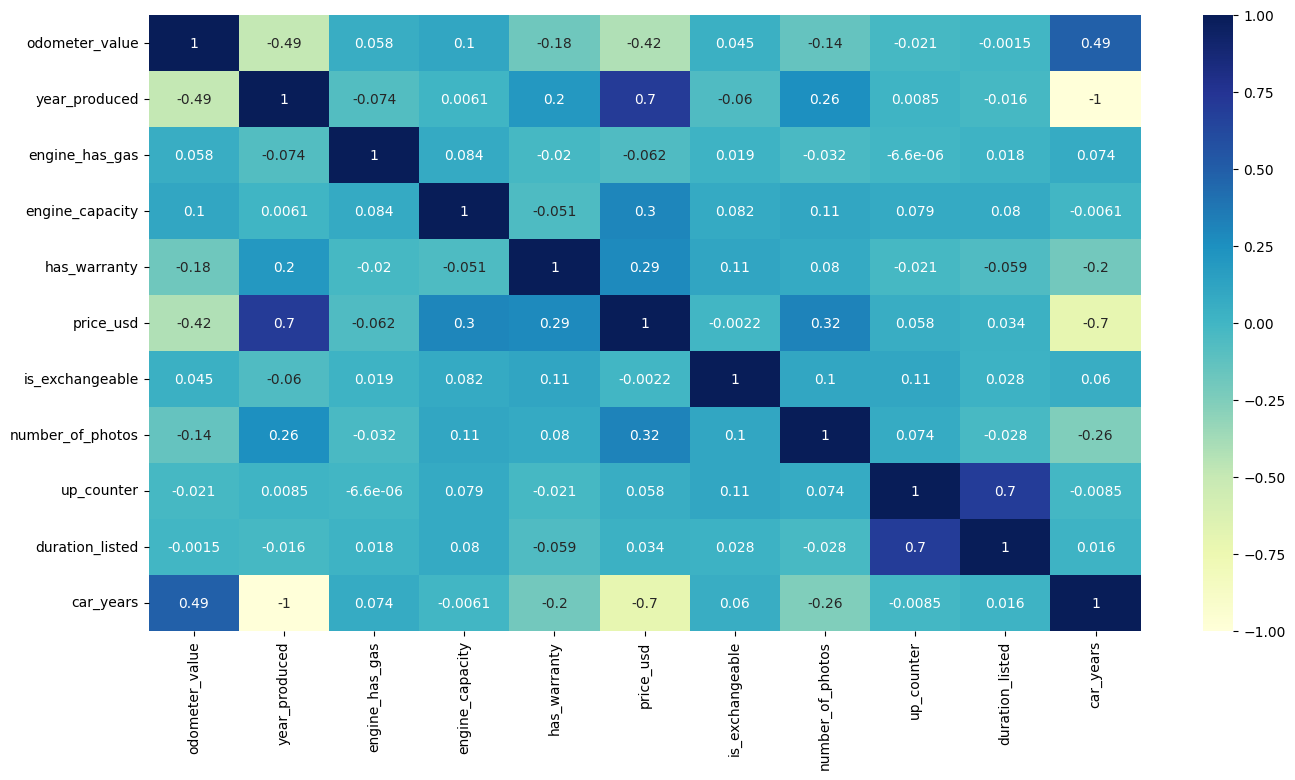

In [113]:
corr=df.corr(numeric_only=True)
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

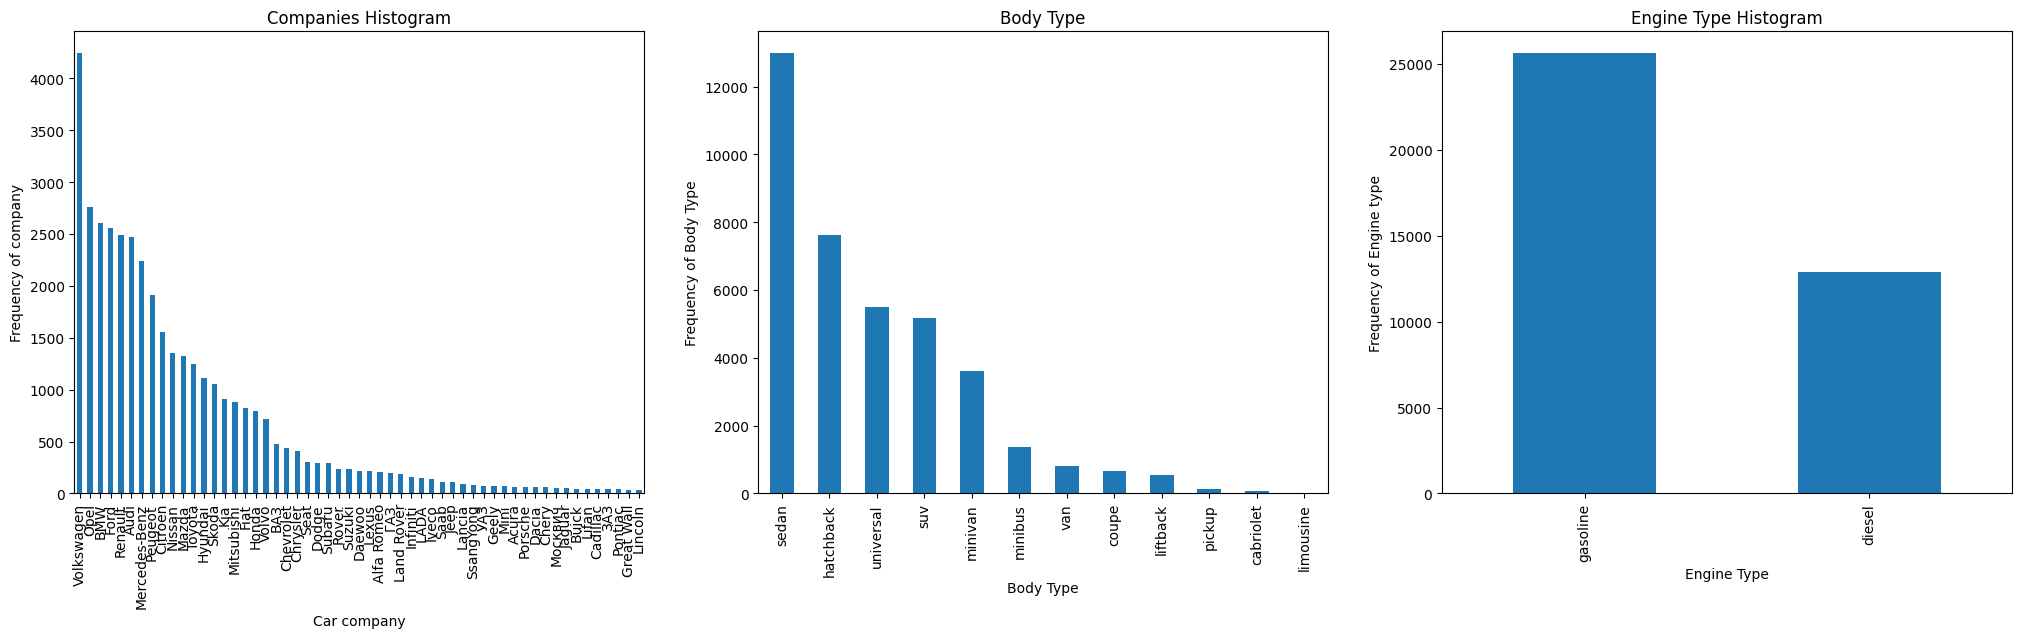

In [114]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.manufacturer_name.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.body_type.value_counts().plot(kind='bar')
plt.title('Body Type')
plt1.set(xlabel = 'Body Type', ylabel='Frequency of Body Type')

plt.subplot(1,3,3)
plt1 = df.engine_type.value_counts().plot(kind='bar')
plt.title('Engine Type Histogram')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Engine type')

plt.show()

<Figure size 3000x1000 with 0 Axes>

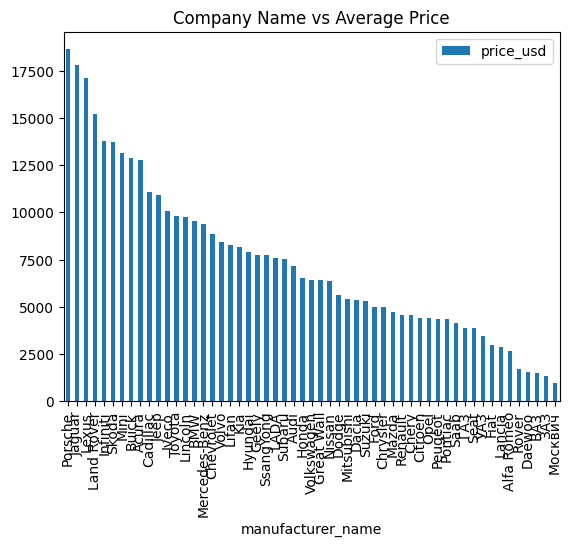

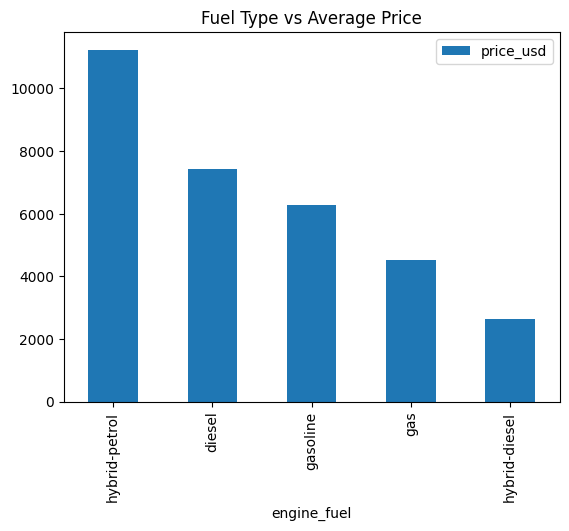

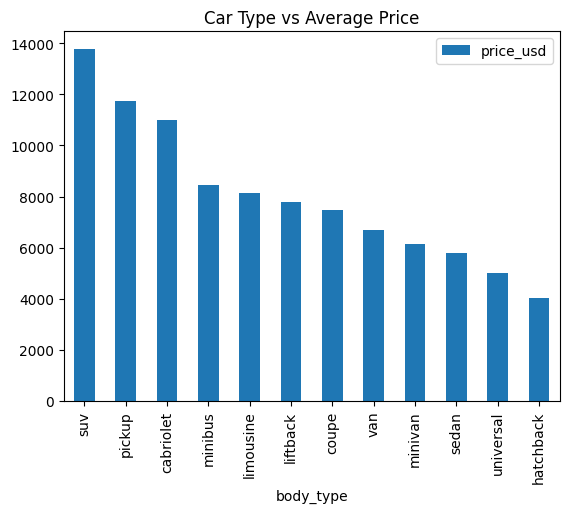

In [115]:
plt.figure(figsize=(30, 10))

df_man = pd.DataFrame(df.groupby(['manufacturer_name'])['price_usd'].mean().sort_values(ascending = False))
df_man.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df_engine = pd.DataFrame(df.groupby(['engine_fuel'])['price_usd'].mean().sort_values(ascending = False))
df_engine.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df_body = pd.DataFrame(df.groupby(['body_type'])['price_usd'].mean().sort_values(ascending = False))
df_body.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

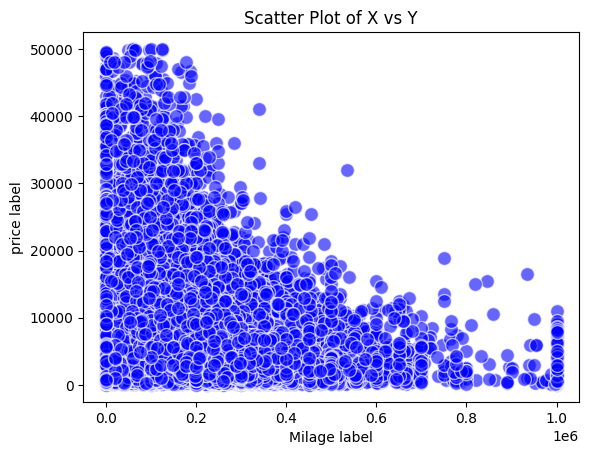

In [116]:
# Create a scatter plot
plt.scatter(df['odometer_value'], df['price_usd'],c='blue', alpha=0.6, edgecolors='w', s=100)
plt.xlabel('Milage label')
plt.ylabel('price label')
plt.title('Scatter Plot of X vs Y')
plt.show()

<ipython-input-117-bdcd7b2f6f1d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['odometer_value'], cmap="Reds", shade=True, bw_adjust=0.5)


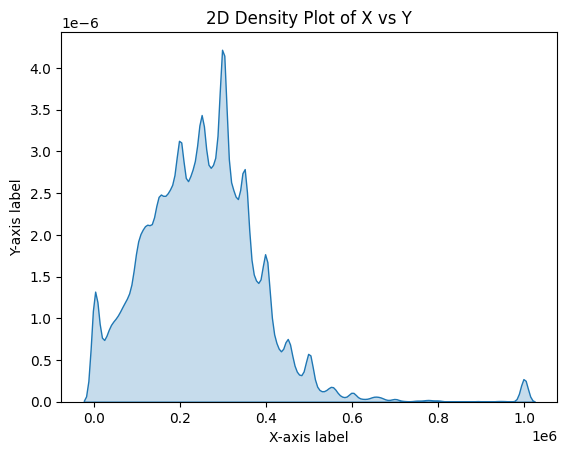

In [117]:
sns.kdeplot(df['odometer_value'], cmap="Reds", shade=True, bw_adjust=0.5)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('2D Density Plot of X vs Y')
plt.show()

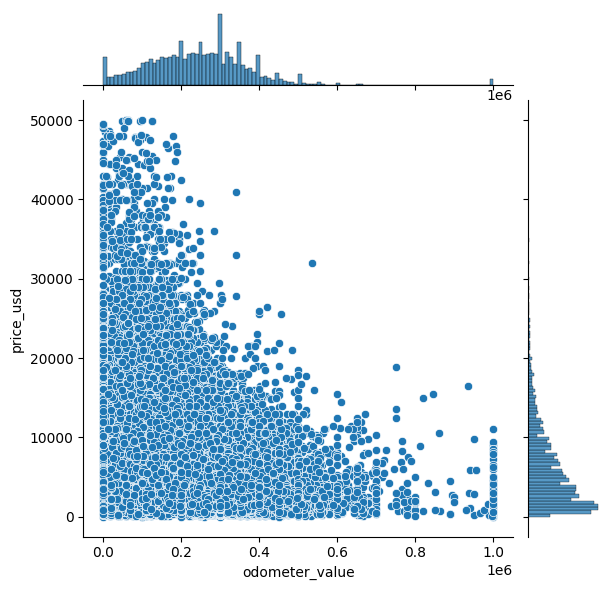

In [118]:
sns.jointplot(x=df['odometer_value'], y=df['price_usd'], kind='scatter')
plt.show()

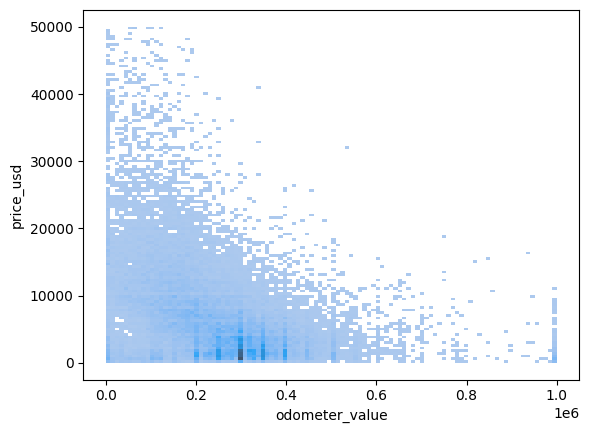

In [119]:
sns.histplot(x=df['odometer_value'], y=df['price_usd'])
plt.show()

In [17]:
cat_cols=df.select_dtypes(include='object').columns
print(cat_cols)

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain'],
      dtype='object')


In [18]:
temp_cat_cols=['transmission', 'color',
       'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain',
       'is_exchangeable','has_warranty','has_warranty','engine_has_gas']

In [19]:
#onehot encoding to the categorical columns
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='ignore', sparse_output=False)
for col in temp_cat_cols:
  df[col]=encoder.fit_transform(df[[col]])


In [20]:
#  target encoding to the model_name feature
mean_target = df.groupby('model_name')['price_usd'].mean()
df['model_name']=df['model_name'].map(mean_target)


In [21]:
#featurehash encoding to manufacturer_name
n_features = 30  # Set number of hashed features
hasher = FeatureHasher(n_features=n_features, input_type='string')

hashed_features = hasher.transform(df['manufacturer_name'].apply(lambda x:[x]))

hashed_array = hashed_features.toarray()

hashed_df = pd.DataFrame(hashed_array, columns=[f'hashed_feature_{i}' for i in range(n_features)])
df=pd.concat([df,hashed_df],axis=1)


In [22]:
df.head(2)


,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,hashed_feature_20,hashed_feature_21,hashed_feature_22,hashed_feature_23,hashed_feature_24,hashed_feature_25,hashed_feature_26,hashed_feature_27,hashed_feature_28,hashed_feature_29
0,Subaru,8873.794925,1.0,0.0,190000,2010,0.0,1.0,0.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Subaru,8873.794925,1.0,0.0,290000,2002,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


  Model Building

In [23]:
# Create Dependent and Independent variables
X = df.drop(['manufacturer_name','price_usd'], axis=1)
y = df['price_usd']

# Split Data into Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

# checking for shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30784, 48)
(7697, 48)
(30784,)
(7697,)


In [24]:
#standards scalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)


LinearRegression()

In [26]:
lm_y_pred = lm.predict(X_test_scaled)


In [27]:
print(lm.coef_)
print(lm.intercept_)

[ 1.54060971e+03  2.69157364e+02  2.57881014e+01 -8.20413695e+02
 -6.75399327e+15 -8.23186147e+02  4.11694748e+01  1.33797236e+03
  6.25730594e+02  1.76973643e+02  6.74641370e+02 -7.74521833e+01
  7.10254091e+02  8.24228960e+01  4.97481726e+02  1.26650379e+01
  1.64570858e+02 -6.75399327e+15  1.37012548e+01 -9.21551110e+01
  1.04961470e+01 -8.99699829e+01 -1.16814661e+02  9.29592945e+01
  3.95768552e+02  3.83336741e+01 -9.38169638e+01 -1.02271484e+02
  1.89302975e+02 -6.39578416e+00 -4.16770000e+02  4.87069660e+01
  9.32471642e+01 -2.49943499e+01  7.99574044e+01 -5.00203161e+02
 -1.34488554e+02  9.29206960e+01 -3.28462684e+01  1.86852221e+01
  2.85394170e+02 -5.27648440e+01 -1.41137492e+02 -2.79209866e+02
  2.13441079e+01  7.10542736e-15 -8.68209911e+01  2.00491096e+02]
6641.771493294751


In [28]:
lm_mse = mean_squared_error(lm_y_pred, y_test)
lm_r2 = r2_score(lm_y_pred, y_test)
print(f"Mean Squared Error: {lm_mse}")
print(f"R2 Score: {lm_r2}")

Mean Squared Error: 10904046.261422148
R2 Score: 0.6254685272965959


In [29]:
rfr = RandomForestRegressor()
rfr.fit(X_train_scaled, y_train)

rfr_y_pred = rfr.predict(X_test_scaled)

In [30]:
rfr_mse = mean_squared_error(rfr_y_pred, y_test)
rfr_r2 = r2_score(rfr_y_pred, y_test)
print(f"Mean Squared Error: {rfr_mse}")
print(f"R2 Score: {rfr_r2}")

Mean Squared Error: 3199053.1978866556
R2 Score: 0.9092190009306503


In [31]:
# Cross Valiadtion
lm_cv_score = cross_val_score(lm, X_train_scaled, y_train, cv=5)
print(f"Linear Regression cross validation score: {lm_cv_score}")

Linear Regression cross validation score: [0.71404994 0.73402858 0.72091327 0.7323904  0.71845749]


In [32]:
# Random Forest Regression cross validation
rfr_cv_score = cross_val_score(rfr, X_train_scaled, y_train, cv=5)
print(f"Random Forest Regression cross validation: {rfr_cv_score}")

Random Forest Regression cross validation: [0.91343936 0.92051107 0.91125989 0.91793841 0.9197574 ]


In [33]:
if lm_cv_score.mean() > rfr_cv_score.mean():
    mld_select = lm
    print("Linear Regression Model is selected.")
else:
    mld_select = rfr
    print("Random Forest Regression is selected.")

Random Forest Regression is selected.


In [34]:
selected_model = mld_select.fit(X_train_scaled, y_train)
print(selected_model)

RandomForestRegressor()


In [35]:
final_pred = selected_model.predict(X_test_scaled)
final_pred

array([ 5275.9441,   986.5317,  3108.7166, ...,  4481.4044, 16275.4022,
        1273.8523])

In [36]:
fnl_rfr_mse = mean_squared_error(final_pred, y_test)
fnl_rfr_r2 = r2_score(final_pred, y_test)
print(f"Mean Squared Error: {fnl_rfr_mse}")
print(f"R2 Score: {fnl_rfr_r2}")


Mean Squared Error: 3192523.6955993623
R2 Score: 0.9092273407697358


In [37]:
from xgboost import XGBRFRegressor
xgbr=XGBRFRegressor()
xgbr.fit(X_train_scaled,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [38]:
xgbr_pred = xgbr.predict(X_test_scaled)

In [39]:
xgbr_mse = mean_squared_error(xgbr_pred, y_test)
xgbr_r2 = r2_score(xgbr_pred, y_test)
print(f"Mean Squared Error: {xgbr_mse}")
print(f"R2 Score: {xgbr_r2}")

Mean Squared Error: 5666823.636432034
R2 Score: 0.8175447566479866


In [143]:
##hyperparameter tuning with Random forest algorithm
# 1. Define the hyperparameter distributions
param_dist = {
    'n_estimators': randint(50, 200),              # Number of trees
    'max_depth': randint(10, 30),                  # Maximum depth of the tree
    'min_samples_split': randint(2, 10),           # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 4),             # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']       # Number of features to consider when looking for the best split
}




In [148]:
# 2. Apply RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=42, scoring='neg_mean_squared_error', verbose=2)
random_search.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae9a777a920>,
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae9a7599360>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae9a7601660>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ae9a7779f00>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [149]:
# 3.  Get the best hyperparameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)


Best hyperparameters: {'max_depth': 22, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 94}


In [40]:
best_rf=RandomForestRegressor(max_depth=22, max_features='auto', min_samples_leaf=1, min_samples_split=8, n_estimators=94)
best_rf.fit(X_train_scaled,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_depth=22, max_features='auto', min_samples_split=8,
                      n_estimators=94)

In [41]:
y_pred = best_rf.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)
r2_hpt_score= r2_score(y_test,y_pred)
print("R2 Score on Test Set:", r2_hpt_score)

Mean Squared Error on Test Set: 3211682.0723570576
R2 Score on Test Set: 0.917640960753696
